In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

df = pd.read_csv('Telco_Churn_Customer.csv')

In [18]:

label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns


for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:

df_dummies = pd.get_dummies(df)
df_dummies.head()

,CUSTOMER_ID,SERVICE_ID,GENDER,AGE,SENIORCITIZEN,PARTNER,DEPENDENTS,CITY,STATE,COUNTRY,...,INTERNET_SERVICE,DATA_USAGE,TEXT_MSGS,VOICE_MINUTES,MONTHLY_BILL,CHURN_REASON,CHURNED,Contract,PaymentMethod,PaperlessBilling
0,98910201,4334,1,29,0,1,0,9,0,0,...,3,7.84,937,693,602.52,0,1,2,0,0
1,24802716,15454,1,65,1,1,1,4,0,0,...,2,0.00,558,607,436.90,9,0,0,0,0
2,68785447,19188,0,39,0,0,1,1,0,0,...,3,9.08,0,0,317.04,2,1,2,1,1
3,2073488,10578,1,66,1,0,0,2,0,0,...,3,1.84,293,307,344.32,9,0,1,1,1
4,48861275,14135,1,69,1,1,1,9,0,0,...,1,2.96,485,693,493.88,9,0,0,2,1


In [21]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['CUSTOMER_ID', 'SERVICE_ID', 'GENDER', 'AGE', 'SENIORCITIZEN',
       'PARTNER', 'DEPENDENTS', 'CITY', 'STATE', 'COUNTRY', 'ZIP_CODE',
       'CUSTOMER_SINCE', 'CUSTOMER_SEGMENT', 'CUSTOMER_TYPE',
       'CUSTOMER_DISCONNCT_DATE', 'CUSTOMER_STATUS', 'TENURE', 'PHONE_SERVICE',
       'MULTIPLE_LINES', 'INTERNET_SERVICE', 'DATA_USAGE', 'TEXT_MSGS',
       'VOICE_MINUTES', 'MONTHLY_BILL', 'CHURN_REASON', 'CHURNED', 'Contract',
       'PaymentMethod', 'PaperlessBilling'],
      dtype='object')


In [22]:

X = df_dummies.drop(['CUSTOMER_ID','SERVICE_ID','ZIP_CODE','CUSTOMER_DISCONNCT_DATE','CUSTOMER_SINCE', 'CHURNED','CHURN_REASON'], axis=1)
y = df_dummies['CHURNED']

In [23]:

print("Features (X):")
print(X.columns.tolist())
print("\nTarget (y):")
print(y.name)

Features (X):
['GENDER', 'AGE', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'CITY', 'STATE', 'COUNTRY', 'CUSTOMER_SEGMENT', 'CUSTOMER_TYPE', 'CUSTOMER_STATUS', 'TENURE', 'PHONE_SERVICE', 'MULTIPLE_LINES', 'INTERNET_SERVICE', 'DATA_USAGE', 'TEXT_MSGS', 'VOICE_MINUTES', 'MONTHLY_BILL', 'Contract', 'PaymentMethod', 'PaperlessBilling']

Target (y):
CHURNED


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [25]:
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_train_scaled, y_train)
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
print(scores.sort_values(by='Score', ascending=False))

                     Score
CUSTOMER_STATUS   0.570753
TENURE            0.373305
STATE             0.008296
DATA_USAGE        0.006091
SENIORCITIZEN     0.004480
MULTIPLE_LINES    0.003648
PHONE_SERVICE     0.003420
PaperlessBilling  0.002396
PaymentMethod     0.001998
Contract          0.001805
MONTHLY_BILL      0.001279
PARTNER           0.001151
VOICE_MINUTES     0.000609
GENDER            0.000514
CUSTOMER_TYPE     0.000106
CUSTOMER_SEGMENT  0.000000
COUNTRY           0.000000
AGE               0.000000
CITY              0.000000
DEPENDENTS        0.000000
INTERNET_SERVICE  0.000000
TEXT_MSGS         0.000000


In [26]:
# Phase 2: Recursive Feature Elimination (RFE)
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train_scaled, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (X.columns[fit.support_]))

Num Features: 5
Selected Features: Index(['AGE', 'CUSTOMER_STATUS', 'TENURE', 'DATA_USAGE', 'MONTHLY_BILL'], dtype='object')


## LOGISTIC

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


Accuracy: 0.8797142857142857
Precision: 0.73474001507159
Recall: 0.8232479594708697
F1 Score: 0.7764799575258826
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     10447
           1       0.73      0.82      0.78      3553

    accuracy                           0.88     14000
   macro avg       0.84      0.86      0.85     14000
weighted avg       0.89      0.88      0.88     14000



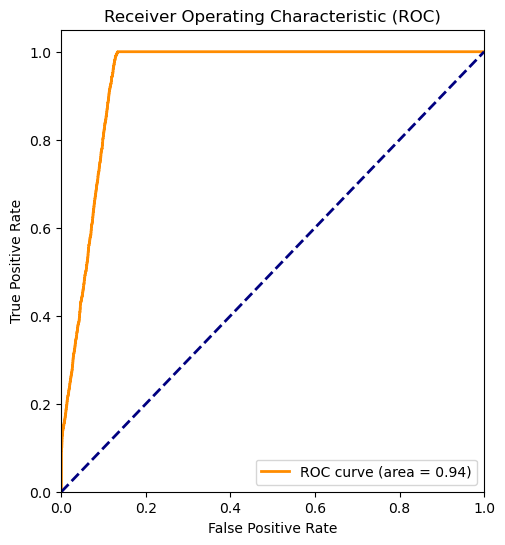

In [13]:

X1 = df_dummies[['AGE', 'MONTHLY_BILL', 'TENURE']]
Y1 = df_dummies['CHURNED']


X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.7, random_state=42)


clf = LogisticRegression(max_iter=1000)  
clf.fit(X1_train, Y1_train)


Y1_pred = clf.predict(X1_test)
Y1_prob = clf.predict_proba(X1_test)[:, 1]  


print("Accuracy:", accuracy_score(Y1_test, Y1_pred))
print("Precision:", precision_score(Y1_test, Y1_pred))
print("Recall:", recall_score(Y1_test, Y1_pred))
print("F1 Score:", f1_score(Y1_test, Y1_pred))


print("Classification Report:\n", classification_report(Y1_test, Y1_pred))


plt.figure(figsize=(12, 6))


fpr, tpr, _ = roc_curve(Y1_test, Y1_prob)
roc_auc = roc_auc_score(Y1_test, Y1_prob)


plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()


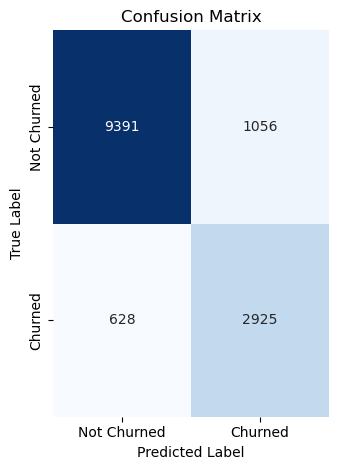

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()